# 060524 Figures 

In [1]:
import sys
# add path for my packages
sys.path.append('C:\\Users\\katsuya2\\OneDrive - University of Illinois - Urbana\\Documents\\Python Scripts\\my_packages')
import re
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import ast
from scipy import optimize
from scipy.optimize import curve_fit
from scipy.stats import norm
import scipy.stats as stats
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from tqdm import tqdm
from pathlib import Path
from glob import glob
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, make_scorer, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor


%precision 3
%matplotlib inline

# use my matplotlib style
style_p = Path("C:/Users/katsuya2/OneDrive - University of Illinois - Urbana/Documents/Python Scripts/my_packages")
plt.style.use(Path(style_p, 'my_rc_setting.mplstyle'))

import Lorentzian

# Figure 1

In [2]:
# 052223 AuNR os glass relative P8 absolute P7
p_data = Path("C:/Users/katsuya2/OneDrive - University of Illinois - Urbana/Documents/Python Scripts/projects/AuNR_DA/datasets")

fig1a_glass_data = pd.read_csv(Path(p_data, '052223_Zhenyang_exp_glass.csv'))
fig1a_glass_data['exp_ene'] = [ast.literal_eval(df) for df in fig1a_glass_data['exp_ene']]
fig1a_glass_data['exp_dfs'] = [ast.literal_eval(df) for df in fig1a_glass_data['exp_dfs']]
fig1a_glass_data['fitting'] = [ast.literal_eval(df) for df in fig1a_glass_data['fitting']]
print(fig1a_glass_data.shape)

# 091123 AuNR on ITO relative P5 absolute P4
fig1a_ito_data = pd.read_csv(Path(p_data, '091123_Zhenyang_exp_ito.csv'))
fig1a_ito_data['exp_ene'] = [ast.literal_eval(df) for df in fig1a_ito_data['exp_ene']]
fig1a_ito_data['exp_dfs'] = [ast.literal_eval(df) for df in fig1a_ito_data['exp_dfs']]
fig1a_ito_data['fitting'] = [ast.literal_eval(df) for df in fig1a_ito_data['fitting']]
print(fig1a_ito_data.shape)

fig1b_glass_data = pd.read_csv(Path(p_data, 'P001_rod_glass_W_30.46_L_89.69.txt'))
fig1b_glass_data['sim_ene'] = 1240 / fig1b_glass_data['wav']
fig1b_ito_data = pd.read_csv(Path(p_data, 'P003_rod_ito_W_28.61_L_88.77.txt'))
fig1b_ito_data['sim_ene'] = 1240 / fig1b_ito_data['wav']

(38, 11)
(62, 11)


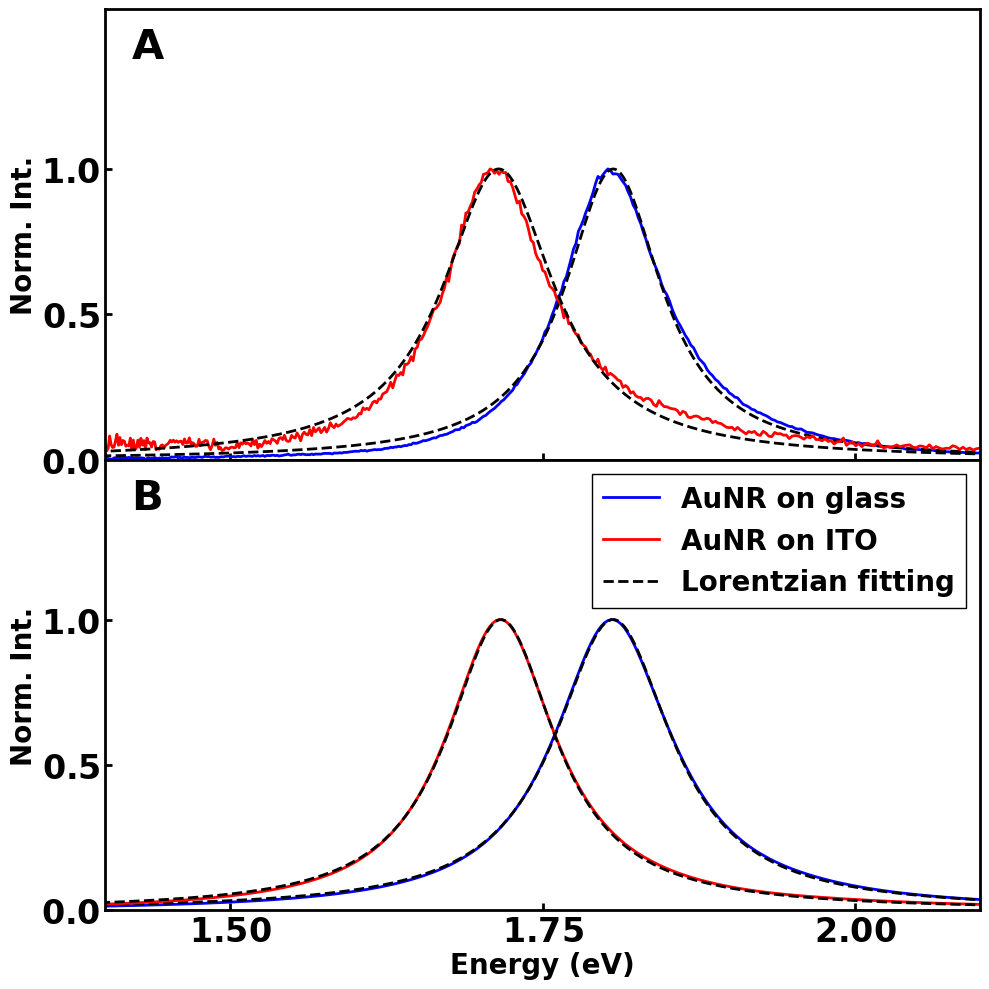

In [3]:
# Create a figure with two subplots, sharing the x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 10), gridspec_kw={'hspace': 0})

# Plot for AuNR on glass and AuNR on ITO (first figure)
part_num = 1
max_int_glass, eres_glass, linewidth_glass = Lorentzian.lorentzian(fig1a_glass_data['exp_ene'][part_num-1], fig1a_glass_data['exp_dfs'][part_num-1])
fitting_exp_glass = Lorentzian.func(fig1a_glass_data['exp_ene'][part_num-1], max_int_glass, eres_glass, linewidth_glass)

ax1.plot(fig1a_glass_data['exp_ene'][part_num-1], [i/max(fig1a_glass_data['exp_dfs'][part_num-1]) for i in fig1a_glass_data['exp_dfs'][part_num-1]], c='b', lw=2, label='AuNR on glass')
ax1.plot(fig1a_glass_data['exp_ene'][part_num-1], [i/max(fitting_exp_glass) for i in fitting_exp_glass], c='k', lw=2, ls='--')

part_num = 3
max_int_ito, eres_ito, linewidth_ito = Lorentzian.lorentzian(fig1a_ito_data['exp_ene'][part_num-1], fig1a_ito_data['exp_dfs'][part_num-1])
fitting_exp_ito = Lorentzian.func(fig1a_ito_data['exp_ene'][part_num-1], max_int_ito, eres_ito, linewidth_ito)

ax1.plot(fig1a_ito_data['exp_ene'][part_num-1], [i/max(fig1a_ito_data['exp_dfs'][part_num-1]) for i in fig1a_ito_data['exp_dfs'][part_num-1]], c='r', lw=2, label='AuNR on ITO')
ax1.plot(fig1a_ito_data['exp_ene'][part_num-1], [i/max(fitting_exp_ito) for i in fitting_exp_ito], c='k', lw=2, ls='--', label='Lorentzian fitting')

ax1.set_yticks([0.0, 0.5, 1.0])
ax1.set_ylabel('Norm. Int.')
ax1.set_xlim(1.4, 2.1)
ax1.set_ylim(0, 1.55)
ax1.text(0.03, 0.96, 'A', ha='left', va='top', transform=ax1.transAxes, fontsize=30)
# ax1.legend(fontsize=20)

# Plot for simulated data (second figure)
max_int_glass, eres_glass, linewidth_glass = Lorentzian.lorentzian(fig1b_glass_data['sim_ene'], fig1b_glass_data['cscat'])
fitting_sim_glass = Lorentzian.func(fig1b_glass_data['sim_ene'], max_int_glass, eres_glass, linewidth_glass)

ax2.plot(fig1b_glass_data['sim_ene'], fig1b_glass_data['cscat']/max(fig1b_glass_data['cscat']), c='b', lw=2, label='AuNR on glass')
ax2.plot(fig1b_glass_data['sim_ene'], fitting_sim_glass/max(fitting_sim_glass), c='k', lw=2, ls='--')

max_int_ito, eres_ito, linewidth_ito = Lorentzian.lorentzian(fig1b_ito_data['sim_ene'], fig1b_ito_data['cscat'])
fitting_sim_ito = Lorentzian.func(fig1b_ito_data['sim_ene'], max_int_ito, eres_ito, linewidth_ito)

ax2.plot(fig1b_ito_data['sim_ene'], fig1b_ito_data['cscat']/max(fig1b_ito_data['cscat']), c='r', lw=2, label='AuNR on ITO')
ax2.plot(fig1b_ito_data['sim_ene'], fitting_sim_ito/max(fitting_sim_ito), c='k', lw=2, ls='--', label='Lorentzian fitting')

ax2.set_xticks([1.5, 1.75, 2.0])
ax2.set_yticks([0.0, 0.5, 1.0])
ax2.set_xlabel('Energy (eV)')
ax2.set_ylabel('Norm. Int.')
ax2.set_xlim(1.4, 2.1)
ax2.set_ylim(0, 1.55)
ax2.text(0.03, 0.96, 'B', ha='left', va='top', transform=ax2.transAxes, fontsize=30)
ax2.legend(fontsize=20)

plt.subplots_adjust(hspace=0)  # Remove the space between plots

# Figure 2

In [2]:
p = Path("C:/Users/katsuya2/OneDrive - University of Illinois - Urbana/Documents/Python Scripts/input_data/SPP2023")

# all glass data
glass_data = pd.read_csv(Path(p, '090723_glass_training.csv'))
glass_data['ratio'] = glass_data['length'] / glass_data['width']
glass_data = glass_data.drop(['corrcoef'], axis=1)
glass_data['volume'] = np.pi*(glass_data['width']**2)*glass_data['length']/4 - np.pi*(glass_data['width']**3)/12

# all ITO data
ito_data = pd.read_csv(Path(p, '111623_ito_training.csv'))
ito_data['ratio'] = ito_data['length'] / ito_data['width']
ito_data = ito_data.drop(['corrcoef'], axis=1)

# further control the dataset so that all aspect ratio in glass can fall into the range of ITO's ratio
ito_ratio_min = ito_data['ratio'].min()
ito_ratio_max = ito_data['ratio'].max()

glass_data = glass_data[(glass_data['ratio'] > ito_ratio_min) & (glass_data['ratio'] < ito_ratio_max)]
glass_data = glass_data.reset_index(drop=True)
print(glass_data.shape)

# further control the dataset so that all width and length in glass can fal into the range of ITO's
ito_width_min = ito_data['width'].min()
ito_width_max = ito_data['width'].max()
ito_length_min = ito_data['length'].min()
ito_length_max = ito_data['length'].max()

glass_data = glass_data[(glass_data['width'] > ito_width_min) & (glass_data['width'] < ito_width_max)]
glass_data = glass_data[(glass_data['length'] > ito_length_min) & (glass_data['length'] < ito_length_max)]
glass_data = glass_data.reset_index(drop=True)
print(glass_data.shape)

# Randomly sample 1000 rows from each dataframe
glass_data = glass_data.sample(n=1000, random_state=42)
glass_data = glass_data.reset_index(drop=True)
ito_data = ito_data.sample(n=1000, random_state=42)
ito_data = ito_data.reset_index(drop=True)
print(glass_data.shape)

(1205, 7)
(1179, 7)
(1000, 7)


## analytical method

In [3]:
def analytical_method(glass_data, target_n):
    l_d = 0.37 * glass_data['volume']**(1/3)
    term1 = (glass_data['width'] + l_d) / (glass_data['width'] + 2*l_d)
    # term2 = l_d / (glass_data['width'] + 2*l_d)
    
    # Constants
    omega_p = 9  # plasma frequency in eV
    epsilon_inf = 9.84  # high-frequency dielectric constant
    n_glass = 1.52  # effective refractive index for glass substrate
    aspect_ratio = glass_data['ratio']  # given aspect ratio
    n_X = target_n  # refractive index for unknown substrate

    alpha = term1
    n_med = 1.0
    n_eff_glass = alpha*n_med + n_glass*(1-alpha)
    n_eff_X = alpha*n_med + n_X*(1-alpha)

    # Depolarization factor L for the given aspect ratio
    L = (1 + aspect_ratio)**-1.6

    # Resonance energy for glass substrate
    E_res_glass = omega_p / np.sqrt(n_eff_glass**2 / L + epsilon_inf - n_eff_glass**2)

    # Resonance energy for unknown substrate
    E_res_X = omega_p / np.sqrt(n_eff_X**2 / L + epsilon_inf - n_eff_X**2)

    # Calculate the factor F
    F = E_res_X / E_res_glass
    
    return F

In [4]:
F_ITO = analytical_method(glass_data, target_n=1.96)

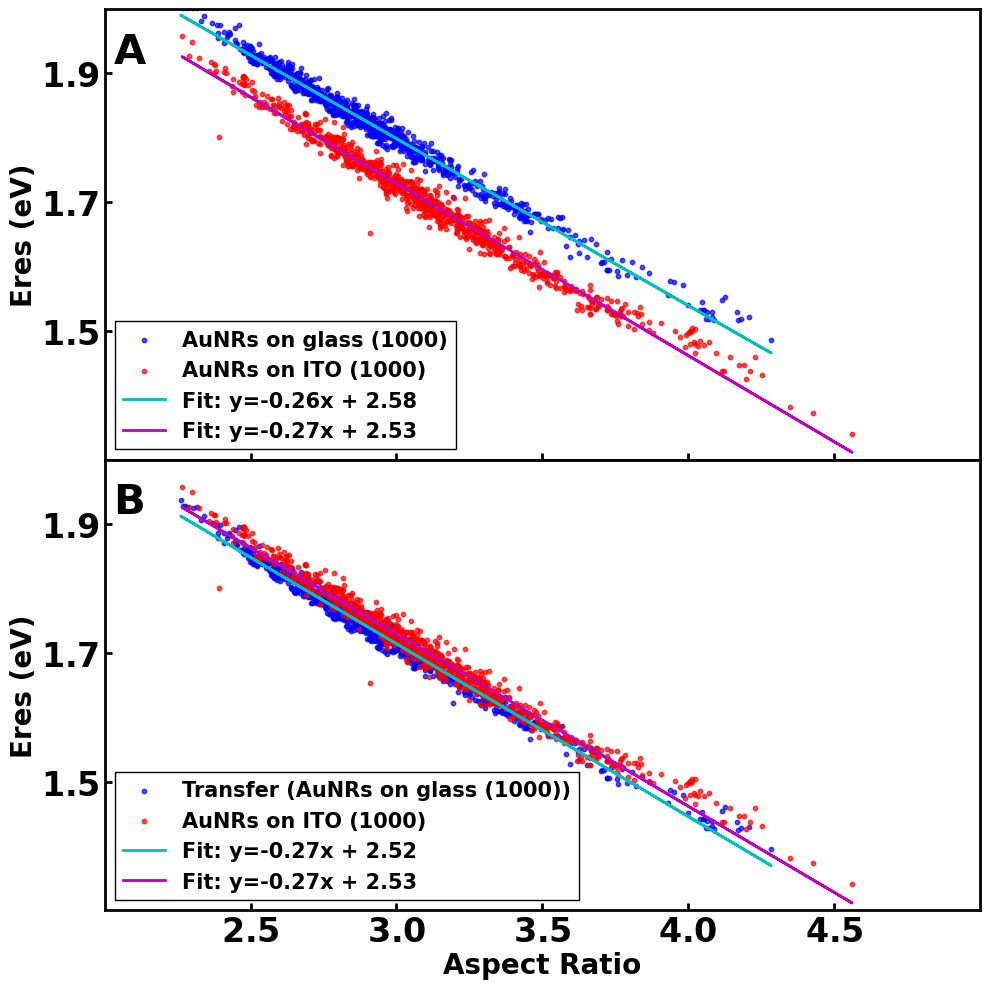

In [5]:
# Create a figure with two subplots, sharing the x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 10), gridspec_kw={'hspace': 0})

# Perform linear regression
model1 = LinearRegression()
model1.fit(glass_data['ratio'].values.reshape(-1, 1), glass_data['eres'])
slope1, intercept1 = model1.coef_[0], model1.intercept_

model2 = LinearRegression()
model2.fit(ito_data['ratio'].values.reshape(-1, 1), ito_data['eres'])
slope2, intercept2 = model2.coef_[0], model2.intercept_

ax1.scatter(glass_data['ratio'], glass_data['eres'], s=10, c='b', alpha=0.7, label=f'AuNRs on glass ({glass_data.shape[0]})')
ax1.scatter(ito_data['ratio'], ito_data['eres'], s=10, c='r', alpha=0.7, label=f'AuNRs on ITO ({ito_data.shape[0]})')
ax1.plot(glass_data['ratio'], slope1 * glass_data['ratio'] + intercept1, c='c', lw=2, label=f'Fit: y={slope1:.2f}x + {intercept1:.2f}')
ax1.plot(ito_data['ratio'], slope2 * ito_data['ratio'] + intercept2, c='m', lw=2, label=f'Fit: y={slope2:.2f}x + {intercept2:.2f}')
ax1.set_xlabel('Aspect Ratio')
ax1.set_ylabel('Eres (eV)')
ax1.set_xticks([2.5, 3.0, 3.5, 4.0, 4.5])
ax1.set_yticks([1.5, 1.7, 1.9])
ax1.set_xlim(2.0, 5.0)
ax1.set_ylim(1.3, 2.0)
ax1.legend(loc='lower left', fontsize=15)
ax1.text(0.01, 0.95, 'A', ha='left', va='top', transform=ax1.transAxes, fontsize=30)

# Perform linear regression
model3 = LinearRegression()
model3.fit(glass_data['ratio'].values.reshape(-1, 1), glass_data['eres']*F_ITO)
slope3, intercept3 = model3.coef_[0], model3.intercept_

ax2.scatter(glass_data['ratio'], glass_data['eres']*F_ITO, s=10, c='b', alpha=0.7, label=f'Transfer (AuNRs on glass ({glass_data.shape[0]}))')
ax2.scatter(ito_data['ratio'], ito_data['eres'], s=10, c='r', alpha=0.7, label=f'AuNRs on ITO ({ito_data.shape[0]})')
ax2.plot(glass_data['ratio'], slope3 * glass_data['ratio'] + intercept3, c='c', lw=2, label=f'Fit: y={slope3:.2f}x + {intercept3:.2f}')
ax2.plot(ito_data['ratio'], slope2 * ito_data['ratio'] + intercept2, c='m', lw=2, label=f'Fit: y={slope2:.2f}x + {intercept2:.2f}')
ax2.set_xlabel('Aspect Ratio')
ax2.set_ylabel('Eres (eV)')
ax2.set_xticks([2.5, 3.0, 3.5, 4.0, 4.5])
ax2.set_yticks([1.5, 1.7, 1.9])
ax2.set_xlim(2.0, 5.0)
ax2.set_ylim(1.3, 2.0)
ax2.legend(loc='lower left', fontsize=15)
ax2.text(0.01, 0.95, 'B', ha='left', va='top', transform=ax2.transAxes, fontsize=30)

plt.subplots_adjust(hspace=0)  # Remove the space between plots

## numerical method

In [3]:
def calc_dif(idx, ito_data, glass_data):
    Eres_glass = glass_data['eres'][idx]
    Linewidth_glass = glass_data['linewidth'][idx]
    AR_glass = glass_data['ratio'][idx]

    upper_min = ito_data[ito_data['ratio'] > AR_glass]['ratio'].min()
    lower_max = ito_data[ito_data['ratio'] < AR_glass]['ratio'].max()

    if abs(upper_min - AR_glass) > abs(lower_max - AR_glass):
        AR_ito_closest = lower_max
    else:
        AR_ito_closest = upper_min

    Eres_ito = ito_data[ito_data['ratio'] == AR_ito_closest]['eres']
    Linewidth_ito = ito_data[ito_data['ratio'] == AR_ito_closest]['linewidth']
    dEres_IG = Eres_ito - Eres_glass
    dLinewidth_IG = Linewidth_ito - Linewidth_glass
    return dEres_IG, dLinewidth_IG


def calculate_mean(lst):
    return sum(lst) / len(lst)


def numerical_method(ito_data, glass_data, target_nsub):
    ito_nsub = 1.96
    glass_nsub = 1.52
    dnsub_IG = ito_nsub - glass_nsub
    dEres_IG_list = []
    dLinewidth_IG_list = []
    for idx in range(glass_data.shape[0]):
        dEres_IG, dLinewidth_IG = calc_dif(idx, ito_data, glass_data)
        if (dEres_IG.shape == (1,)) and (dLinewidth_IG.shape == (1,)): 
            dEres_IG_list.append(dEres_IG.values)
            dLinewidth_IG_list.append(dLinewidth_IG.values)

    dEres_IG_mean = calculate_mean(dEres_IG_list)
    dLinewidth_IG_mean = calculate_mean(dLinewidth_IG_list)
    C = dEres_IG_mean / dnsub_IG
    D = dLinewidth_IG_mean / dnsub_IG
    target_Eres = C*(target_nsub - glass_nsub) + glass_data['eres']
    target_Linewidth = D*(target_nsub - glass_nsub) + glass_data['linewidth']
    return target_Eres, target_Linewidth

In [4]:
ITO_nsub = 1.96
ITO_Eres, ITO_Linewidth = numerical_method(ito_data, glass_data, target_nsub=ITO_nsub)

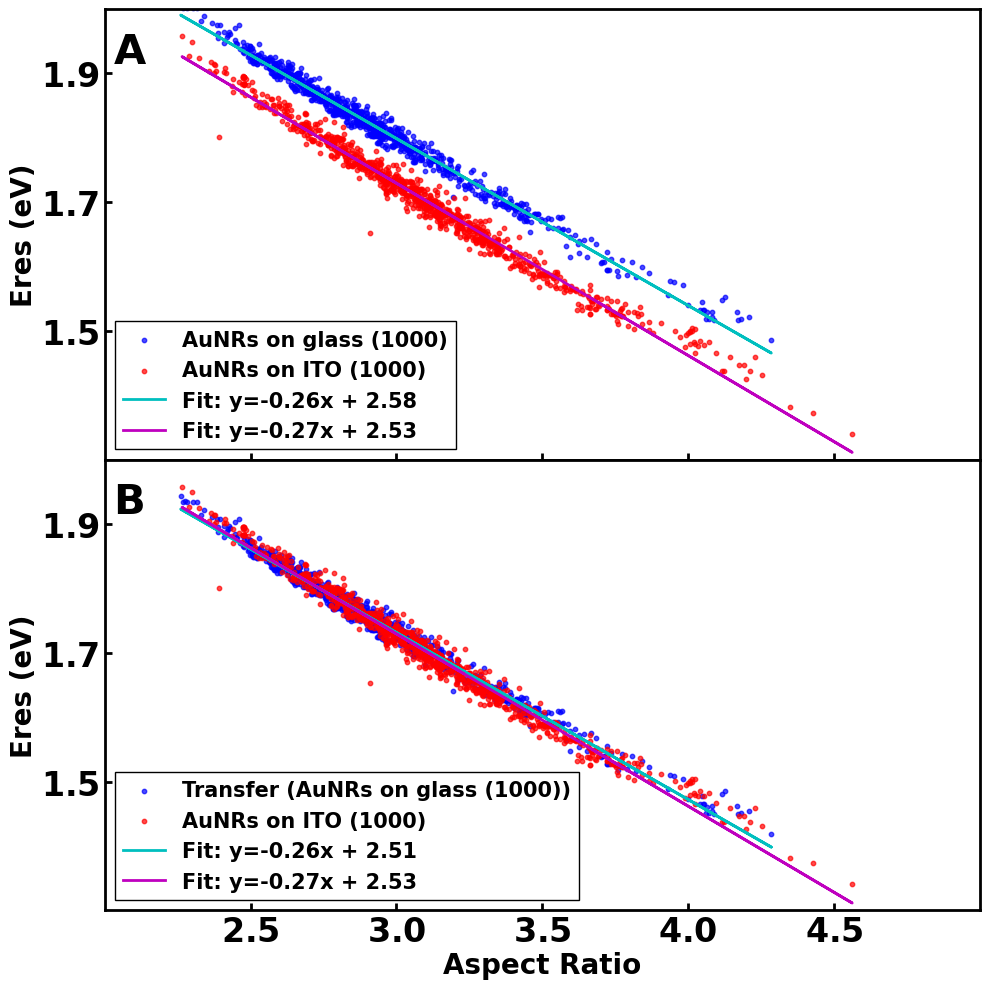

In [5]:
# Create a figure with two subplots, sharing the x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 10), gridspec_kw={'hspace': 0})

# Perform linear regression
model1 = LinearRegression()
model1.fit(glass_data['ratio'].values.reshape(-1, 1), glass_data['eres'])
slope1, intercept1 = model1.coef_[0], model1.intercept_

model2 = LinearRegression()
model2.fit(ito_data['ratio'].values.reshape(-1, 1), ito_data['eres'])
slope2, intercept2 = model2.coef_[0], model2.intercept_

ax1.scatter(glass_data['ratio'], glass_data['eres'], s=10, c='b', alpha=0.7, label=f'AuNRs on glass ({glass_data.shape[0]})')
ax1.scatter(ito_data['ratio'], ito_data['eres'], s=10, c='r', alpha=0.7, label=f'AuNRs on ITO ({ito_data.shape[0]})')
ax1.plot(glass_data['ratio'], slope1 * glass_data['ratio'] + intercept1, c='c', lw=2, label=f'Fit: y={slope1:.2f}x + {intercept1:.2f}')
ax1.plot(ito_data['ratio'], slope2 * ito_data['ratio'] + intercept2, c='m', lw=2, label=f'Fit: y={slope2:.2f}x + {intercept2:.2f}')
ax1.set_xlabel('Aspect Ratio')
ax1.set_ylabel('Eres (eV)')
ax1.set_xticks([2.5, 3.0, 3.5, 4.0, 4.5])
ax1.set_yticks([1.5, 1.7, 1.9])
ax1.set_xlim(2.0, 5.0)
ax1.set_ylim(1.3, 2.0)
ax1.legend(loc='lower left', fontsize=15)
ax1.text(0.01, 0.95, 'A', ha='left', va='top', transform=ax1.transAxes, fontsize=30)

# Perform linear regression
model3 = LinearRegression()
model3.fit(glass_data['ratio'].values.reshape(-1, 1), ITO_Eres)
slope3, intercept3 = model3.coef_[0], model3.intercept_

ax2.scatter(glass_data['ratio'], ITO_Eres, s=10, c='b', alpha=0.7, label=f'Transfer (AuNRs on glass ({glass_data.shape[0]}))')
ax2.scatter(ito_data['ratio'], ito_data['eres'], s=10, c='r', alpha=0.7, label=f'AuNRs on ITO ({ito_data.shape[0]})')
ax2.plot(glass_data['ratio'], slope3 * glass_data['ratio'] + intercept3, c='c', lw=2, label=f'Fit: y={slope3:.2f}x + {intercept3:.2f}')
ax2.plot(ito_data['ratio'], slope2 * ito_data['ratio'] + intercept2, c='m', lw=2, label=f'Fit: y={slope2:.2f}x + {intercept2:.2f}')
ax2.set_xlabel('Aspect Ratio')
ax2.set_ylabel('Eres (eV)')
ax2.set_xticks([2.5, 3.0, 3.5, 4.0, 4.5])
ax2.set_yticks([1.5, 1.7, 1.9])
ax2.set_xlim(2.0, 5.0)
ax2.set_ylim(1.3, 2.0)
ax2.legend(loc='lower left', fontsize=15)
ax2.text(0.01, 0.95, 'B', ha='left', va='top', transform=ax2.transAxes, fontsize=30)

plt.subplots_adjust(hspace=0)  # Remove the space between plots

# Figure 3

## analytical method

In [6]:
glass_data = glass_data.sample(800, random_state=42)
# define input and output
X_glass = glass_data.drop(['width', 'length', 'imax', 'ratio', 'volume'], axis=1)
yw_glass = glass_data['width']
yl_glass = glass_data['length']

F_ITO = analytical_method(glass_data, target_n=1.96)

ito_data = ito_data.sample(200, random_state=42)
X_ito = ito_data.drop(['width', 'length', 'imax', 'ratio'], axis=1)
yw_ito = ito_data['width']
yl_ito = ito_data['length']

In [7]:
# parameters for GridSearchCV class
param_grid = {'max_depth': range(1, 21)}

# Initialize GridSearchCV class
gsw = GridSearchCV(estimator=DecisionTreeRegressor(),
                  param_grid=param_grid,
                  cv=10, scoring="neg_mean_squared_error")

# fitting
gsw.fit(X_glass, yw_glass)
yw_pred1 = gsw.predict(X_ito)

rel_errw1 = (abs(yw_ito-yw_pred1)/yw_ito)*100
rmspew1 = (sum(rel_errw1**2)/len(yw_pred1)) ** 0.5
maew1 = mean_absolute_error(yw_ito, yw_pred1)

# Initialize GridSearchCV class
gsl = GridSearchCV(estimator=DecisionTreeRegressor(),
                  param_grid=param_grid,
                  cv=10, scoring="neg_mean_squared_error")

# fitting
gsl.fit(X_glass, yl_glass)
yl_pred1 = gsl.predict(X_ito)

rel_errl1 = (abs(yl_ito-yl_pred1)/yl_ito)*100
rmspel1 = (sum(rel_errl1**2)/len(yl_pred1)) ** 0.5
mael1 = mean_absolute_error(yl_ito, yl_pred1)

print(rmspew1, rmspel1)
print(maew1, mael1)

4.947297939043012 11.1205551804446
1.2771386011277244 9.350483333333333


In [8]:
X_glass['eres'] = X_glass['eres']*F_ITO

In [9]:
# parameters for GridSearchCV class
param_grid = {'max_depth': range(1, 21)}

# Initialize GridSearchCV class
gsw = GridSearchCV(estimator=DecisionTreeRegressor(),
                  param_grid=param_grid,
                  cv=10, scoring="neg_mean_squared_error")

# fitting
gsw.fit(X_glass, yw_glass)
yw_pred2 = gsw.predict(X_ito)

rel_errw2 = (abs(yw_ito-yw_pred2)/yw_ito)*100
rmspew2 = (sum(rel_errw2**2)/len(yw_pred2)) ** 0.5
maew2 = mean_absolute_error(yw_ito, yw_pred2)

# Initialize GridSearchCV class
gsl = GridSearchCV(estimator=DecisionTreeRegressor(),
                  param_grid=param_grid,
                  cv=10, scoring="neg_mean_squared_error")

# fitting
gsl.fit(X_glass, yl_glass)
yl_pred2 = gsl.predict(X_ito)

rel_errl2 = (abs(yl_ito-yl_pred2)/yl_ito)*100
rmspel2 = (sum(rel_errl2**2)/len(yl_pred2)) ** 0.5
mael2 = mean_absolute_error(yl_ito, yl_pred2)

print(rmspew2, rmspel2)
print(maew2, mael2)

5.703034070547697 6.641519119053985
1.250117872136386 4.552570074224215


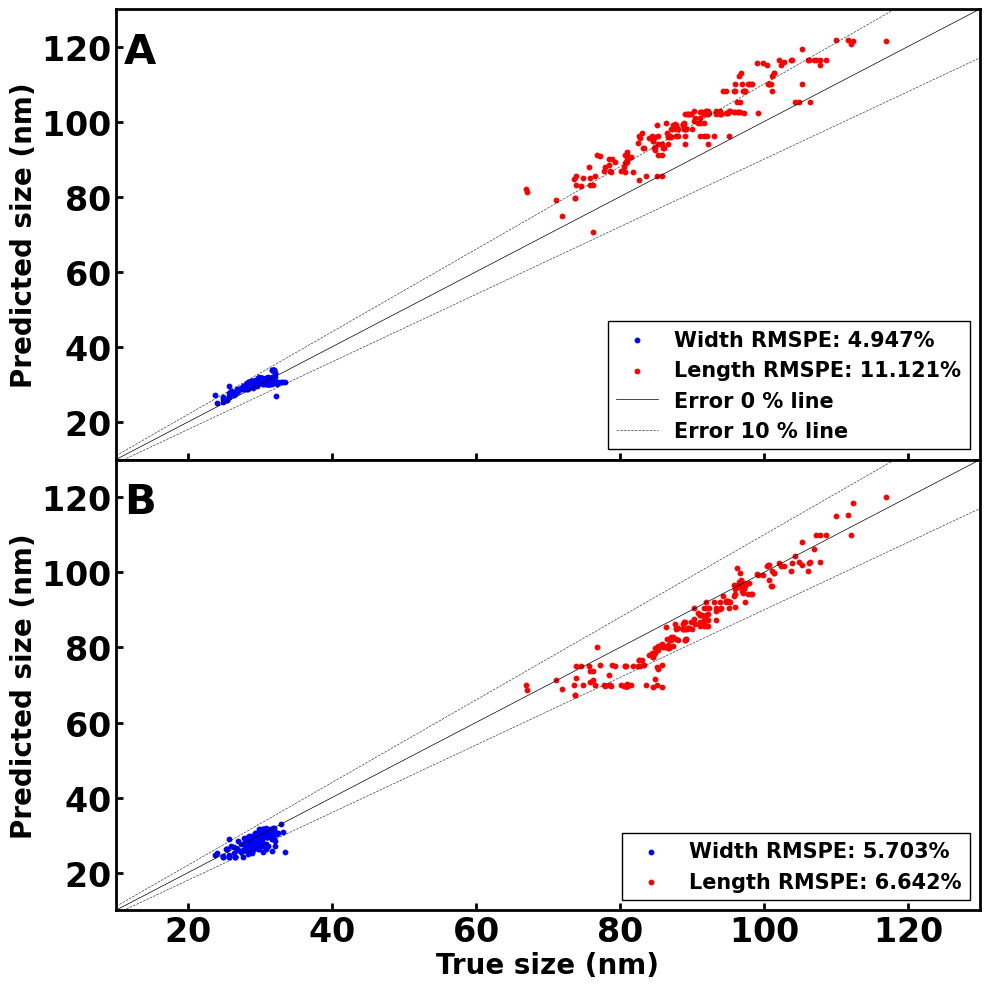

In [10]:
# Create a figure with two subplots, sharing the x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 10), gridspec_kw={'hspace': 0})

ax1.scatter(yw_ito, yw_pred1, s=10, c='b', label=f'Width RMSPE: {round(rmspew1, 3)}%')
ax1.scatter(yl_ito, yl_pred1, s=10, c='r', label=f'Length RMSPE: {round(rmspel1, 3)}%')

x = np.arange(-1, 181)
ax1.plot(x, x, c='k', lw=0.5, label='Error 0 % line')
ax1.plot(x, 1.1*x, c='k', linestyle='--', lw=0.5, label='Error 10 % line', alpha=0.75)
ax1.plot(x, 0.9*x, c='k', linestyle='--', lw=0.5, alpha=0.75)

ax1.set_xlabel('True size (nm)')
ax1.set_ylabel('Predicted size (nm)')
# ax1.set_xticks([2.5, 3.0, 3.5, 4.0, 4.5])
# ax1.set_yticks([1.5, 1.7, 1.9])
ax1.set_xlim(10, 130)
ax1.set_ylim(10, 130)
ax1.legend(loc='lower right', fontsize=15)
ax1.text(0.01, 0.95, 'A', ha='left', va='top', transform=ax1.transAxes, fontsize=30)

ax2.scatter(yw_ito, yw_pred2, s=10, c='b', label=f'Width RMSPE: {round(rmspew2, 3)}%')
ax2.scatter(yl_ito, yl_pred2, s=10, c='r', label=f'Length RMSPE: {round(rmspel2, 3)}%')

ax2.plot(x, x, c='k', lw=0.5)
ax2.plot(x, 1.1*x, c='k', linestyle='--', lw=0.5, alpha=0.75)
ax2.plot(x, 0.9*x, c='k', linestyle='--', lw=0.5, alpha=0.75)

ax2.set_xlabel('True size (nm)')
ax2.set_ylabel('Predicted size (nm)')
# ax2.set_xticks([2.5, 3.0, 3.5, 4.0, 4.5])
# ax2.set_yticks([1.5, 1.7, 1.9])
ax2.set_xlim(10, 130)
ax2.set_ylim(10, 130)
ax2.legend(loc='lower right', fontsize=15)
ax2.text(0.01, 0.95, 'B', ha='left', va='top', transform=ax2.transAxes, fontsize=30)

plt.subplots_adjust(hspace=0)  # Remove the space between plots

## numerical method

In [6]:
glass_data = glass_data.sample(800, random_state=42)
glass_data = glass_data.reset_index(drop=True)
# define input and output
X_glass = glass_data.drop(['width', 'length', 'imax', 'ratio', 'volume'], axis=1)
yw_glass = glass_data['width']
yl_glass = glass_data['length']

ito_data = ito_data.sample(200, random_state=42)
X_ito = ito_data.drop(['width', 'length', 'imax', 'ratio'], axis=1)
yw_ito = ito_data['width']
yl_ito = ito_data['length']

In [7]:
# parameters for GridSearchCV class
param_grid = {'max_depth': range(1, 21)}

# Initialize GridSearchCV class
gsw = GridSearchCV(estimator=DecisionTreeRegressor(),
                  param_grid=param_grid,
                  cv=10, scoring="neg_mean_squared_error")

# fitting
gsw.fit(X_glass, yw_glass)
yw_pred1 = gsw.predict(X_ito)

rel_errw1 = (abs(yw_ito-yw_pred1)/yw_ito)*100
rmspew1 = (sum(rel_errw1**2)/len(yw_pred1)) ** 0.5
maew1 = mean_absolute_error(yw_ito, yw_pred1)

# Initialize GridSearchCV class
gsl = GridSearchCV(estimator=DecisionTreeRegressor(),
                  param_grid=param_grid,
                  cv=10, scoring="neg_mean_squared_error")

# fitting
gsl.fit(X_glass, yl_glass)
yl_pred1 = gsl.predict(X_ito)

rel_errl1 = (abs(yl_ito-yl_pred1)/yl_ito)*100
rmspel1 = (sum(rel_errl1**2)/len(yl_pred1)) ** 0.5
mael1 = mean_absolute_error(yl_ito, yl_pred1)

print(rmspew1, rmspel1)
print(maew1, mael1)

4.938827523255669 11.002566831040296
1.2733469344610575 9.319583333333332


In [8]:
ITO_nsub = 1.96
ITO_Eres, ITO_Linewidth = numerical_method(ito_data, glass_data, target_nsub=ITO_nsub)

# Combine into a DataFrame
X_glass = pd.DataFrame({
    'eres': ITO_Eres,
    'linewidth': ITO_Linewidth
})
pd.DataFrame(ITO_Eres, ITO_Linewidth)

yw_glass = glass_data['width']
yl_glass = glass_data['length']

In [9]:
# parameters for GridSearchCV class
param_grid = {'max_depth': range(1, 21)}

# Initialize GridSearchCV class
gsw = GridSearchCV(estimator=DecisionTreeRegressor(),
                  param_grid=param_grid,
                  cv=10, scoring="neg_mean_squared_error")

# fitting
gsw.fit(X_glass, yw_glass)
yw_pred2 = gsw.predict(X_ito)

rel_errw2 = (abs(yw_ito-yw_pred2)/yw_ito)*100
rmspew2 = (sum(rel_errw2**2)/len(yw_pred2)) ** 0.5
maew2 = mean_absolute_error(yw_ito, yw_pred2)

# Initialize GridSearchCV class
gsl = GridSearchCV(estimator=DecisionTreeRegressor(),
                  param_grid=param_grid,
                  cv=10, scoring="neg_mean_squared_error")

# fitting
gsl.fit(X_glass, yl_glass)
yl_pred2 = gsl.predict(X_ito)

rel_errl2 = (abs(yl_ito-yl_pred2)/yl_ito)*100
rmspel2 = (sum(rel_errl2**2)/len(yl_pred2)) ** 0.5
mael2 = mean_absolute_error(yl_ito, yl_pred2)

print(rmspew2, rmspel2)
print(maew2, mael2)

5.134880889319188 4.967804185604391
1.1769935011293462 3.3000389858670744


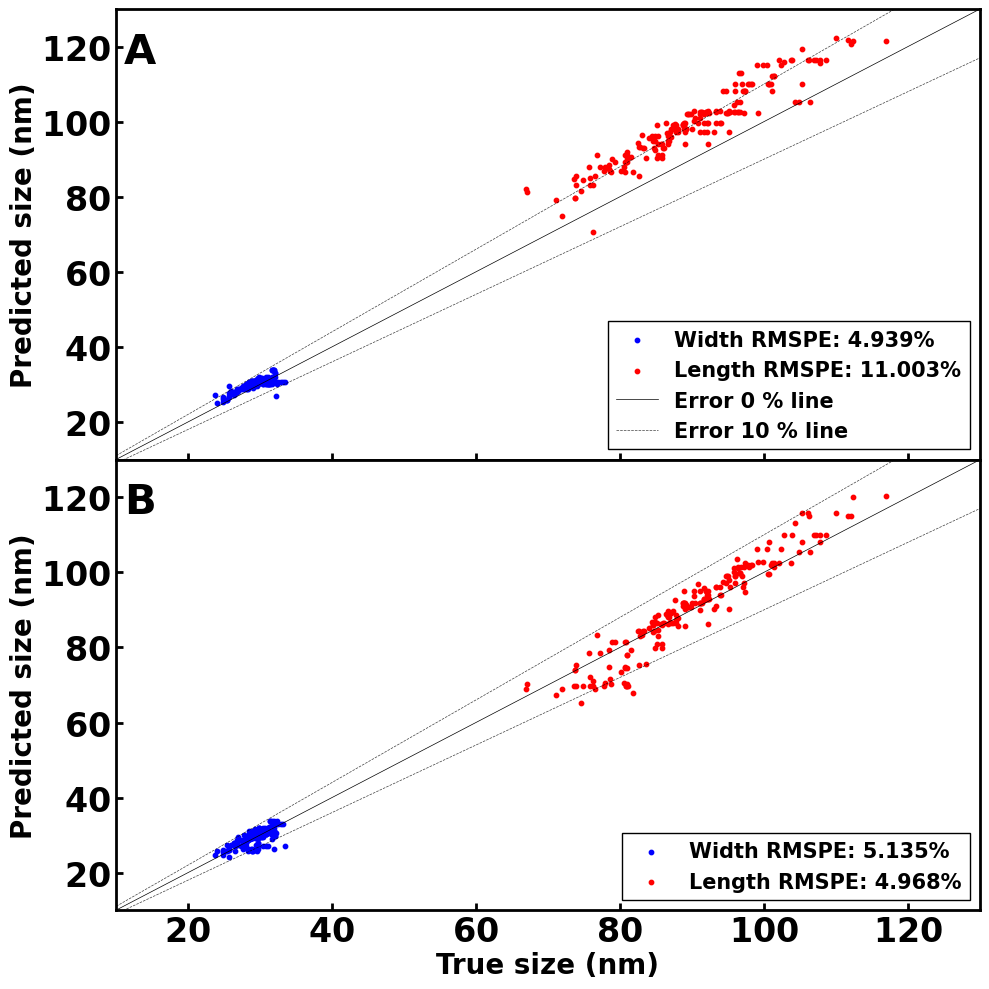

In [10]:
# Create a figure with two subplots, sharing the x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 10), gridspec_kw={'hspace': 0})

ax1.scatter(yw_ito, yw_pred1, s=10, c='b', label=f'Width RMSPE: {round(rmspew1, 3)}%')
ax1.scatter(yl_ito, yl_pred1, s=10, c='r', label=f'Length RMSPE: {round(rmspel1, 3)}%')

x = np.arange(-1, 181)
ax1.plot(x, x, c='k', lw=0.5, label='Error 0 % line')
ax1.plot(x, 1.1*x, c='k', linestyle='--', lw=0.5, label='Error 10 % line', alpha=0.75)
ax1.plot(x, 0.9*x, c='k', linestyle='--', lw=0.5, alpha=0.75)

ax1.set_xlabel('True size (nm)')
ax1.set_ylabel('Predicted size (nm)')
# ax1.set_xticks([2.5, 3.0, 3.5, 4.0, 4.5])
# ax1.set_yticks([1.5, 1.7, 1.9])
ax1.set_xlim(10, 130)
ax1.set_ylim(10, 130)
ax1.legend(loc='lower right', fontsize=15)
ax1.text(0.01, 0.95, 'A', ha='left', va='top', transform=ax1.transAxes, fontsize=30)

ax2.scatter(yw_ito, yw_pred2, s=10, c='b', label=f'Width RMSPE: {round(rmspew2, 3)}%')
ax2.scatter(yl_ito, yl_pred2, s=10, c='r', label=f'Length RMSPE: {round(rmspel2, 3)}%')

ax2.plot(x, x, c='k', lw=0.5)
ax2.plot(x, 1.1*x, c='k', linestyle='--', lw=0.5, alpha=0.75)
ax2.plot(x, 0.9*x, c='k', linestyle='--', lw=0.5, alpha=0.75)

ax2.set_xlabel('True size (nm)')
ax2.set_ylabel('Predicted size (nm)')
# ax2.set_xticks([2.5, 3.0, 3.5, 4.0, 4.5])
# ax2.set_yticks([1.5, 1.7, 1.9])
ax2.set_xlim(10, 130)
ax2.set_ylim(10, 130)
ax2.legend(loc='lower right', fontsize=15)
ax2.text(0.01, 0.95, 'B', ha='left', va='top', transform=ax2.transAxes, fontsize=30)

plt.subplots_adjust(hspace=0)  # Remove the space between plots

# Figure 4

In [11]:
p_data = Path("C:/Users/katsuya2/OneDrive - University of Illinois - Urbana/Documents/Python Scripts/projects/AuNR_DA/datasets")
tio2_data = pd.read_csv(Path(p_data, '040424_tio2_data.csv'))
tio2_data['ratio'] = tio2_data['length'] / tio2_data['width']

In [12]:
print(tio2_data.shape)
tio2_data = tio2_data[(tio2_data['width'] > ito_data['width'].min()) & (tio2_data['width'] < ito_data['width'].max()) 
                       & (tio2_data['length'] > ito_data['length'].min()) & (tio2_data['length'] < ito_data['length'].max())]

tio2_data = tio2_data.reset_index(drop=True)
print(tio2_data.shape)

# tio2_data = tio2_data.sample(50, random_state=42)
X_tio2 = tio2_data.drop(['width', 'length', 'imax', 'R2', 'ratio'], axis=1)
yw_tio2 = tio2_data['width']
yl_tio2 = tio2_data['length']
print(tio2_data.shape)

(303, 7)
(90, 7)
(90, 7)


## analytical method

In [13]:
F_TiO2 = analytical_method(glass_data, target_n=2.36)
X_glass['eres'] = X_glass['eres']*F_TiO2

In [14]:
# parameters for GridSearchCV class
param_grid = {'max_depth': range(1, 21)}

# Initialize GridSearchCV class
gsw = GridSearchCV(estimator=DecisionTreeRegressor(),
                  param_grid=param_grid,
                  cv=10, scoring="neg_mean_squared_error")

# fitting
gsw.fit(X_glass, yw_glass)
yw_pred3 = gsw.predict(X_tio2)

rel_errw3 = (abs(yw_tio2-yw_pred3)/yw_tio2)*100
rmspew3 = (sum(rel_errw3**2)/len(yw_pred3)) ** 0.5
maew3 = mean_absolute_error(yw_tio2, yw_pred3)

# Initialize GridSearchCV class
gsl = GridSearchCV(estimator=DecisionTreeRegressor(),
                  param_grid=param_grid,
                  cv=10, scoring="neg_mean_squared_error")

# fitting
gsl.fit(X_glass, yl_glass)
yl_pred3 = gsl.predict(X_tio2)

rel_errl3 = (abs(yl_tio2-yl_pred3)/yl_tio2)*100
rmspel3 = (sum(rel_errl3**2)/len(yl_pred3)) ** 0.5
mael3 = mean_absolute_error(yl_tio2, yl_pred3)

print(rmspew3, rmspel3)
print(maew3, mael3)

16.566739980040932 13.478471252520158
3.9682421015712683 10.443078188169858


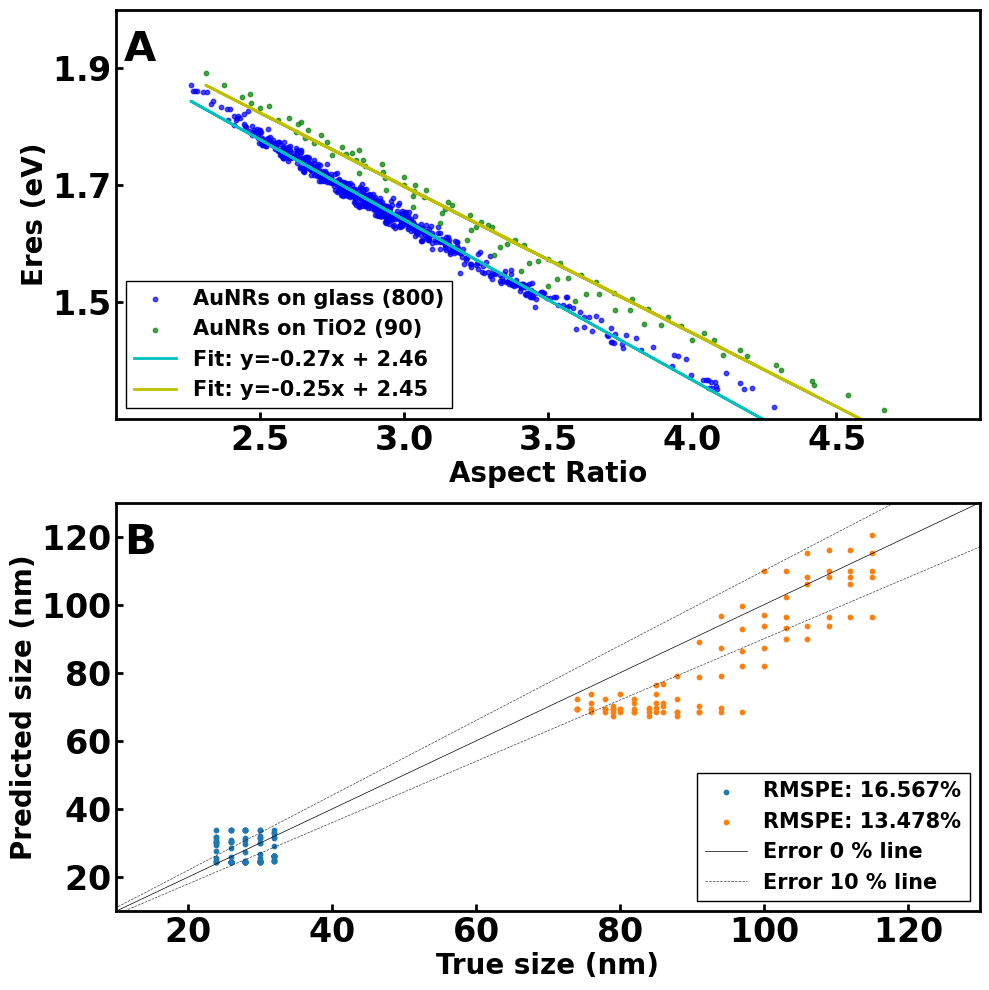

In [15]:
# Create a figure with two subplots, sharing the x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=False, figsize=(10, 10))

# Perform linear regression
model1 = LinearRegression()
model1.fit(glass_data['ratio'].values.reshape(-1, 1), glass_data['eres']*F_TiO2)
slope1, intercept1 = model1.coef_[0], model1.intercept_

model2 = LinearRegression()
model2.fit(tio2_data['ratio'].values.reshape(-1, 1), tio2_data['eres'])
slope2, intercept2 = model2.coef_[0], model2.intercept_

ax1.scatter(glass_data['ratio'], glass_data['eres']*F_TiO2, s=10, c='b', alpha=0.7, label=f'AuNRs on glass ({glass_data.shape[0]})')
ax1.scatter(tio2_data['ratio'], tio2_data['eres'], s=10, c='g', alpha=0.7, label=f'AuNRs on TiO2 ({tio2_data.shape[0]})')
ax1.plot(glass_data['ratio'], slope1 * glass_data['ratio'] + intercept1, c='c', lw=2, label=f'Fit: y={slope1:.2f}x + {intercept1:.2f}')
ax1.plot(tio2_data['ratio'], slope2 * tio2_data['ratio'] + intercept2, c='y', lw=2, label=f'Fit: y={slope2:.2f}x + {intercept2:.2f}')
ax1.set_xlabel('Aspect Ratio')
ax1.set_ylabel('Eres (eV)')
ax1.set_xticks([2.5, 3.0, 3.5, 4.0, 4.5])
ax1.set_yticks([1.5, 1.7, 1.9])
ax1.set_xlim(2.0, 5.0)
ax1.set_ylim(1.3, 2.0)
ax1.legend(loc='lower left', fontsize=15)
ax1.text(0.01, 0.95, 'A', ha='left', va='top', transform=ax1.transAxes, fontsize=30)

ax2.scatter(yw_tio2, yw_pred3, s=10, label=f'RMSPE: {round(rmspew3, 3)}%')
ax2.scatter(yl_tio2, yl_pred3, s=10, label=f'RMSPE: {round(rmspel3, 3)}%')

ax2.plot(x, x, c='k', lw=0.5, label='Error 0 % line')
ax2.plot(x, 1.1*x, c='k', linestyle='--', lw=0.5, label='Error 10 % line', alpha=0.75)
ax2.plot(x, 0.9*x, c='k', linestyle='--', lw=0.5, alpha=0.75)

ax2.set_xlabel('True size (nm)')
ax2.set_ylabel('Predicted size (nm)')
# ax2.set_xticks([2.5, 3.0, 3.5, 4.0, 4.5])
# ax2.set_yticks([1.5, 1.7, 1.9])
ax2.set_xlim(10, 130)
ax2.set_ylim(10, 130)
ax2.legend(loc='lower right', fontsize=15)
ax2.text(0.01, 0.95, 'B', ha='left', va='top', transform=ax2.transAxes, fontsize=30)

plt.subplots_adjust(hspace=0)  # Remove the space between plots

## numerical method

In [13]:
TiO2_nsub = 2.36
TiO2_Eres, TiO2_Linewidth = numerical_method(ito_data, glass_data, target_nsub=TiO2_nsub)

In [14]:
# Combine into a DataFrame
X_glass = pd.DataFrame({
    'eres': TiO2_Eres,
    'linewidth': TiO2_Linewidth
})
pd.DataFrame(TiO2_Eres, TiO2_Linewidth)

yw_glass = glass_data['width']
yl_glass = glass_data['length']

In [15]:
# parameters for GridSearchCV class
param_grid = {'max_depth': range(1, 21)}

# Initialize GridSearchCV class
gsw = GridSearchCV(estimator=DecisionTreeRegressor(),
                  param_grid=param_grid,
                  cv=10, scoring="neg_mean_squared_error")

# fitting
gsw.fit(X_glass, yw_glass)
yw_pred3 = gsw.predict(X_tio2)

rel_errw3 = (abs(yw_tio2-yw_pred3)/yw_tio2)*100
rmspew3 = (sum(rel_errw3**2)/len(yw_pred3)) ** 0.5
maew3 = mean_absolute_error(yw_tio2, yw_pred3)

# Initialize GridSearchCV class
gsl = GridSearchCV(estimator=DecisionTreeRegressor(),
                  param_grid=param_grid,
                  cv=10, scoring="neg_mean_squared_error")

# fitting
gsl.fit(X_glass, yl_glass)
yl_pred3 = gsl.predict(X_tio2)

rel_errl3 = (abs(yl_tio2-yl_pred3)/yl_tio2)*100
rmspel3 = (sum(rel_errl3**2)/len(yl_pred3)) ** 0.5
mael3 = mean_absolute_error(yl_tio2, yl_pred3)

print(rmspew3, rmspel3)
print(maew3, mael3)

18.617771748087193 10.665139034695606
4.352867895737932 8.187309171075839


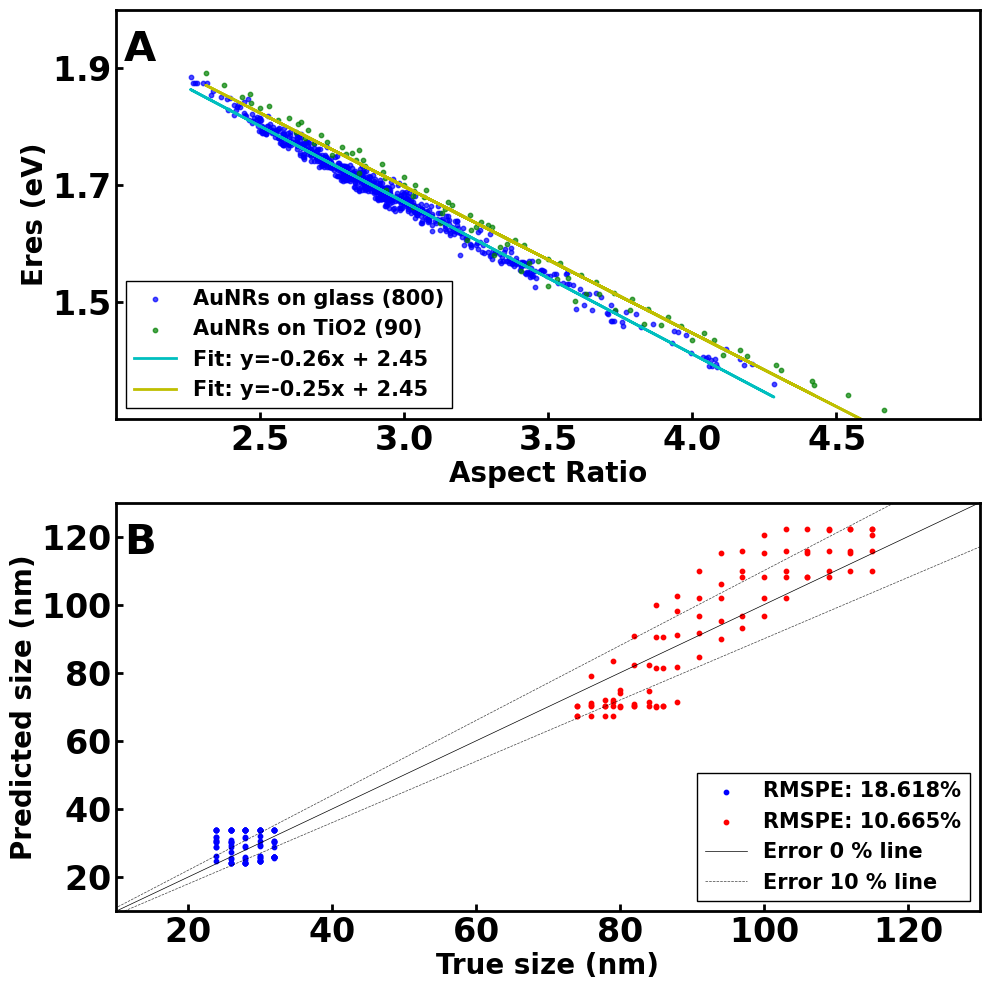

In [17]:
# Create a figure with two subplots, sharing the x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=False, figsize=(10, 10))

# Perform linear regression
model1 = LinearRegression()
model1.fit(glass_data['ratio'].values.reshape(-1, 1), TiO2_Eres)
# model1.fit(glass_data['ratio'].values.reshape(-1, 1), glass_data['eres'])
slope1, intercept1 = model1.coef_[0], model1.intercept_

model2 = LinearRegression()
model2.fit(tio2_data['ratio'].values.reshape(-1, 1), tio2_data['eres'])
slope2, intercept2 = model2.coef_[0], model2.intercept_

ax1.scatter(glass_data['ratio'], TiO2_Eres, s=10, c='b', alpha=0.7, label=f'AuNRs on glass ({glass_data.shape[0]})')
# ax1.scatter(glass_data['ratio'], glass_data['eres'], s=10, c='b', alpha=0.7, label=f'AuNRs on glass ({glass_data.shape[0]})')
ax1.scatter(tio2_data['ratio'], tio2_data['eres'], s=10, c='g', alpha=0.7, label=f'AuNRs on TiO2 ({tio2_data.shape[0]})')
ax1.plot(glass_data['ratio'], slope1 * glass_data['ratio'] + intercept1, c='c', lw=2, label=f'Fit: y={slope1:.2f}x + {intercept1:.2f}')
ax1.plot(tio2_data['ratio'], slope2 * tio2_data['ratio'] + intercept2, c='y', lw=2, label=f'Fit: y={slope2:.2f}x + {intercept2:.2f}')
ax1.set_xlabel('Aspect Ratio')
ax1.set_ylabel('Eres (eV)')
ax1.set_xticks([2.5, 3.0, 3.5, 4.0, 4.5])
ax1.set_yticks([1.5, 1.7, 1.9])
ax1.set_xlim(2.0, 5.0)
ax1.set_ylim(1.3, 2.0)
ax1.legend(loc='lower left', fontsize=15)
ax1.text(0.01, 0.95, 'A', ha='left', va='top', transform=ax1.transAxes, fontsize=30)

ax2.scatter(yw_tio2, yw_pred3, s=10, c='b', label=f'RMSPE: {round(rmspew3, 3)}%')
ax2.scatter(yl_tio2, yl_pred3, s=10, c='r', label=f'RMSPE: {round(rmspel3, 3)}%')

ax2.plot(x, x, c='k', lw=0.5, label='Error 0 % line')
ax2.plot(x, 1.1*x, c='k', linestyle='--', lw=0.5, label='Error 10 % line', alpha=0.75)
ax2.plot(x, 0.9*x, c='k', linestyle='--', lw=0.5, alpha=0.75)

ax2.set_xlabel('True size (nm)')
ax2.set_ylabel('Predicted size (nm)')
# ax2.set_xticks([2.5, 3.0, 3.5, 4.0, 4.5])
# ax2.set_yticks([1.5, 1.7, 1.9])
ax2.set_xlim(10, 130)
ax2.set_ylim(10, 130)
ax2.legend(loc='lower right', fontsize=15)
ax2.text(0.01, 0.95, 'B', ha='left', va='top', transform=ax2.transAxes, fontsize=30)

plt.subplots_adjust(hspace=0)  # Remove the space between plots